# Pincipal Component Analysis in scikit-learn - Lab

## Introduction

PCA algorithm is generally applied in dimension reduction contexts with an option to visualize a complex high dimensional dataset in 2D or 3D. PCA can also do an amazing job towards removing the computational cost of other machine learning algorithms by allowing them to train on a reduced set of features (principal components)
In this lesson, we shall look into implementing PCA with `scikit-learn` to the popular iris dataset, in an attempt to reduce the number of dimensions from 4 to 2 and see if the reduced set of dimensions would still preserve the variance of complete dataset. 

## Objectives

You will be able to:

- Perform PCA in Python and scikit-learn using Iris dataset
- Measure the impact of PCA on the accuracy of classification algorithms
- Plot the decision boundary of different classification experiments to visually inspect their performance. 

## Iris Dataset

In this post we'll see how to use Principal Component Analysis to perform linear data reduction for the purpose of data visualization. Let's load the necessary libraries and iris dataset to get us started. 

Perform following steps:

- Load Iris dataset into a pandas data frame  from the source "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data". (You can use `read_scv()` to load it directly from the server. 
- Give appropriate column names to dataset
- View the contents of the dataset

In [9]:
# Load necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

data, target = load_iris(return_X_y=True)
# Your code here 
X = pd.DataFrame(data, columns = load_iris().feature_names)
y = pd.Series(target)
print(y)
X.head()


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


So here we see a set of four input features i.e. four dimensions. Our goal for this simple analysis is to reduce this number to 2 (or 3) so that we can visualize the resulting principal components using the standard plotting techniques that we have learned so far in the course. 

## Standardize the Data

We have seen that PCA creates a feature __subspace__ that maximizes the variance along the axes. As features could belong to different scales of measurement, our first step in PCA is __always__ to standardize the feature set. Although, all features in the Iris dataset were measured on a same scale (i.e. cm), we shall still perform this step to get a mean=0 and variance=1 as a "standard practice". This helps PCA and a number of other machine learning algorithms to perform optimally. Visit [Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) at sk-learn documentation to read more on this. 

Let's create our feature and target datasets first.
- Create a set of features with 'sepal length', 'sepal width', 'petal length', 'petal width'. 
- Create X and y datasets based on features and target variables

In [2]:
# Create features and Target dataset


# Your code here 



Now we can take our feature set `X`  and standardize it using `StandardScalar` method from sk-learn. 
- Standardize the feature set X

In [12]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

# Your code here 
X_std_array = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std_array, columns = load_iris().feature_names)
X_std.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA Projection to 2D Space

We shall now project the original data which is 4 dimensional into 2 dimensions. Remember,  there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variance present in the data. To perform `PCA` with sk-learn, we need to import it first and create an instance of PCA while defining the number of principal components. 

- Initialize an instance of PCA from scikit-learn with 2 components
- Fit the data to the model
- Extract the first 2 principal components from the trained model

In [18]:
# Run the PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Number of principal components required
pca.fit(X_std)

# Your code here 
print(pca.components_)
X_pca = pd.DataFrame(pca.transform(X_std))


[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


We can now save the results in a new dataframe and name the columns according the first/second component. 

- Append the target (flower name) to the principal components in a pandas dataframe 

In [22]:
# Create a new dataset fro principal components 
df = pd.concat((X_pca, y), axis = 1)
df.columns = ['PC1', 'PC2', 'target']
print(df['target'].value_counts())
df.head()
# Your code here 



2    50
1    50
0    50
Name: target, dtype: int64


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Great, we now have a set of two dimensions, reduced from four against our target variable, the flower name. Let's now try to visualize this dataset and see if the different flower species remain separable. 

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples

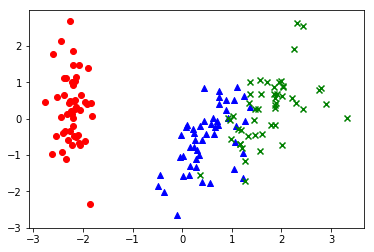

In [27]:
import matplotlib.pyplot as plt
# Principal Componets scatter plot
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

# Your code here 
plt.scatter(df0['PC1'], df0['PC2'], color = 'red', marker = 'o')
plt.scatter(df1['PC1'], df1['PC2'], color = 'blue', marker = '^')
plt.scatter(df2['PC1'], df2['PC2'], color = 'green', marker = 'x')
plt.show()

## Explained Variance

> __The explained variance tells us how much information (variance) can be attributed to each of the principal components__

We can see above that the three classes in the dataset remain well separable. iris-virginica and iris-versicolor could be better separated, but we have to remember that we just reduced the size of dimensions to half. the cost-performance trade-off is something that data scientists often have to come across. In order to get a better idea around how much variance of the original dataset is explained in principal components, we can use the attribute `explained_variance_ratio_`.

- Check the explained variance of the two principal components using `explained_variance_ratio_`

In [30]:
# Calculate the variance explained by pricipal components
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_)*100)

# Your code here 



[0.72962445 0.22850762]
95.81320720000164


First two PCs contain 95.80% of the information. The first PC contains 72.77% of the variance and the second PC contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset. 

## Compare Performance of an Classifier with PCA

So our principal components above explained 95% of variance in the data. How much would it effect the accuracy of a classifier? The best way to answer this is with a simple classifier like `KNeighborsClassifier`. We can try to classify this dataset in its original form vs. principal components computed above. 

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a trai/test split of 80/20
- For reproducability of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [39]:
# classification complete Iris dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Your code here 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 9)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_hat_pred = clf.predict(X_test)
accuracy_score(y_test, y_hat_pred)

1.0

Great , so we see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may different randomly based on the load on your cpu and number of processes running on your PC. 

Now let's repeat the above process for dataset made from principal components 
- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a trai/test split of 80/20
- For reproducability of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [40]:
# Run the classifer on PCA'd data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = .2, random_state = 9)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_hat_pred = clf.predict(X_test)
accuracy_score(y_test, y_hat_pred)

# Your code here 



0.9666666666666667

So we see that going from 4 actual dimensions to two derived dimensions. We manage to get an accuracy of 96%. There is some loss but considering big data domain with data possibly having thousands of features, this trade-off is often accepted in order to simplify and speed up computation. The time taken to run the classifer is much less than what we saw with complete dataset. 

## Bonus : Visualize Decision Boundary 

visualizing decision boundary is good way to develop the intuition around a classifier's performance with 2/3 dimensional data. We can do this often to point out the examples that may not get classified correctly. It also helps us get an insight into how a certain algorithm draws these boundaries i.e. the learning process of an algorithm. 

- Draw the decision boundary for the classification with principal components (Optional - with complete dataset)

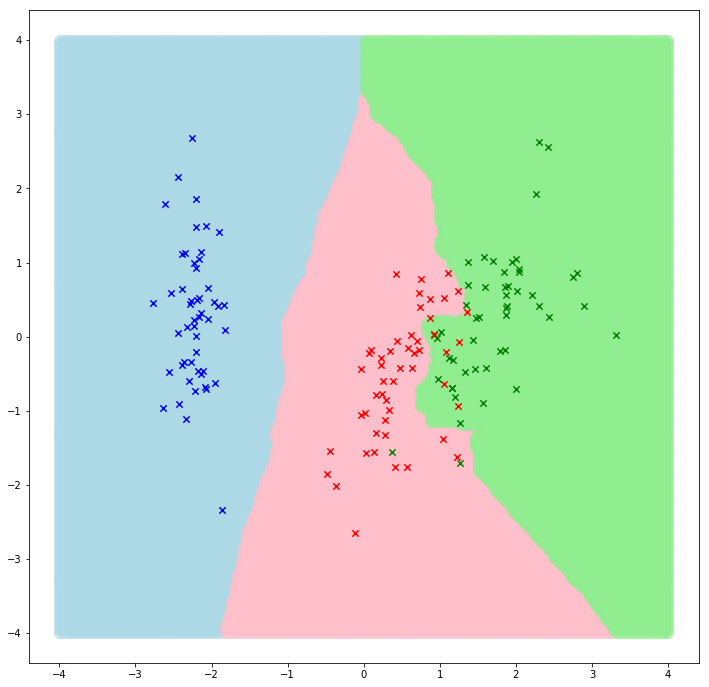

In [78]:
# Plot decision boundary using principal components 
import numpy as np

xvalues = np.linspace(-4, 4, num = 200)
yvalues = np.linspace(-4, 4, num = 200)

xx, yy = np.meshgrid(xvalues, yvalues)
data = np.c_[xx.ravel(), yy.ravel()]
y_hat_pred = clf.predict(data)
plt.figure(figsize = (12, 12))

for i, col in enumerate(['lightblue', 'pink', 'lightgreen']):
    y_hat_mask = y_hat_pred == i
    data_m = data[y_hat_mask]
    plt.plot(data_m[:,0], data_m[:,1], color = col, marker = 'o', linestyle = 'none', markersize = 10, alpha = 0.5)

plt.scatter(df0['PC1'], df0['PC2'], color = 'blue', marker = 'x', s = 40, zorder=100)
plt.scatter(df1['PC1'], df1['PC2'], color = 'red', marker = 'x', s = 40, zorder=99)
plt.scatter(df2['PC1'], df2['PC2'], color = 'green', marker = 'x', s = 40, zorder=98)

plt.show()
# Your code here 



## Level Up - Optional 

- Use following classifier instead of KNN shown above to see how much PCA effects the accuracy, coming from 4 to 2 dimensions. 

```python
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
```

- Use 3 principal components instead of two and re-run your experiment to see the impact on the accuracy. 

## Summary 

In this lab we applied PCA to the popular Iris dataset. We looked at performance of a simple classifier and impact of PCA on it. NExt we shall take PCA to a more specialized domain i.e. Computer Vision and Image Processing and see how this technique can be used to image classification and data compression tasks. 